<a href="https://colab.research.google.com/github/5harad/API201-students/blob/main/lectures/lecture-7-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 7: Discrete probability distributions

In [1]:
library(tidyverse)

# set a simple black & white theme for our plots
theme_set(theme_bw())

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Part 1: Tornadoes 

In [2]:
set.seed(1)

In [3]:
num_tornadoes <- c(0, 1, 2, 3, 4, 5)
p <- c(.1, .15, .4, .2, .1, .05)

sample(num_tornadoes, 1, prob=p)

[1] 2

In [4]:
sample(num_tornadoes, 1, prob=p)

[1] 2

In [5]:
sample(num_tornadoes, 1, prob=p)

[1] 3

In [6]:
sample(num_tornadoes, 10, prob=p, replace = TRUE)

[1] 4 2 4 4 1 1 2 2 2 1

In [7]:
sample(num_tornadoes, 10, prob=p, replace = TRUE)

[1] 2 0 3 1 5 2 0 4 2 1

In [8]:
many_worlds <- sample(num_tornadoes, 1e5, prob = p, replace = TRUE)

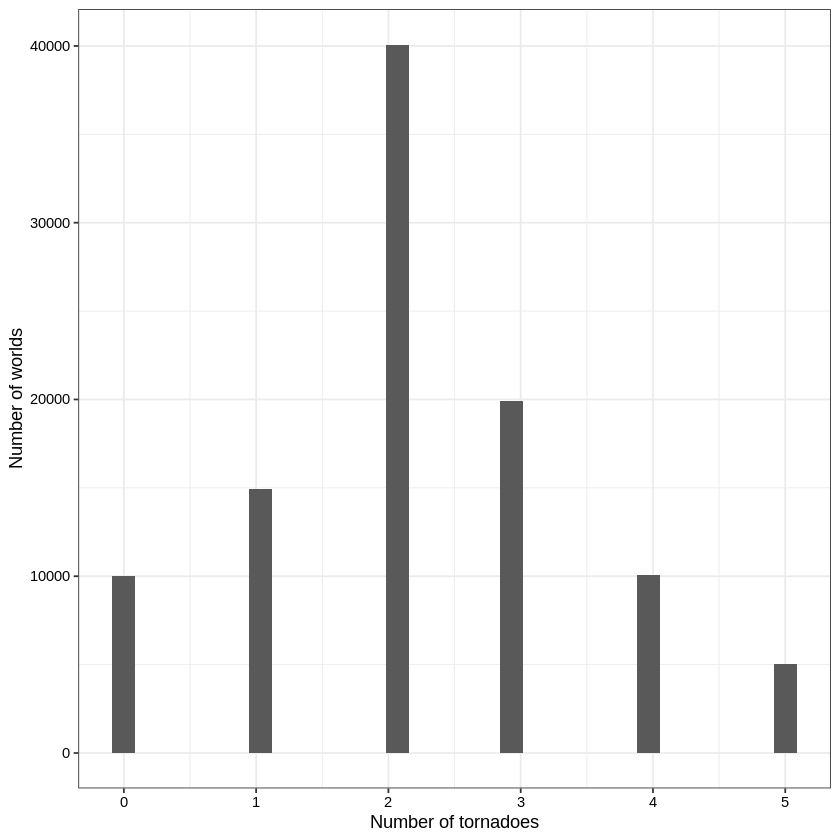

In [9]:
ggplot(tibble(num_tornadoes = many_worlds), aes(x = num_tornadoes)) + 
  geom_histogram(bins=30) +
  scale_y_continuous('Number of worlds') +
  scale_x_continuous('Number of tornadoes', breaks=0:5) +
  theme(axis.text.x = element_text(color="black"),
          axis.text.y = element_text(color="black"))

ggsave('tornadoes.png', width=4, height=4)

Bernoulli random variables indicate whether an event happens, for example whether there was _at least_ one tornado in a given year.

In [10]:
rbernoulli(10, 0.9)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [11]:
rbernoulli(10, 0.9)

[1] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

We can add up Bernoulli random variables to model the number of events that happen over a certain number of trials, like the number of years over a 50-year span, in which there's at least one tornado.

In [12]:
Xs <- rbernoulli(50, 0.9)
Xs

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[13] FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[25] FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
[37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[49]  TRUE  TRUE

In [13]:
Z = sum(Xs)
Z

[1] 42

In [14]:
sum(rbernoulli(50, 0.9))

[1] 43

In [15]:
sum(rbernoulli(50, 0.9))

[1] 43

In [16]:
many_worlds <- replicate(1e5, sum(rbernoulli(50, 0.9)))

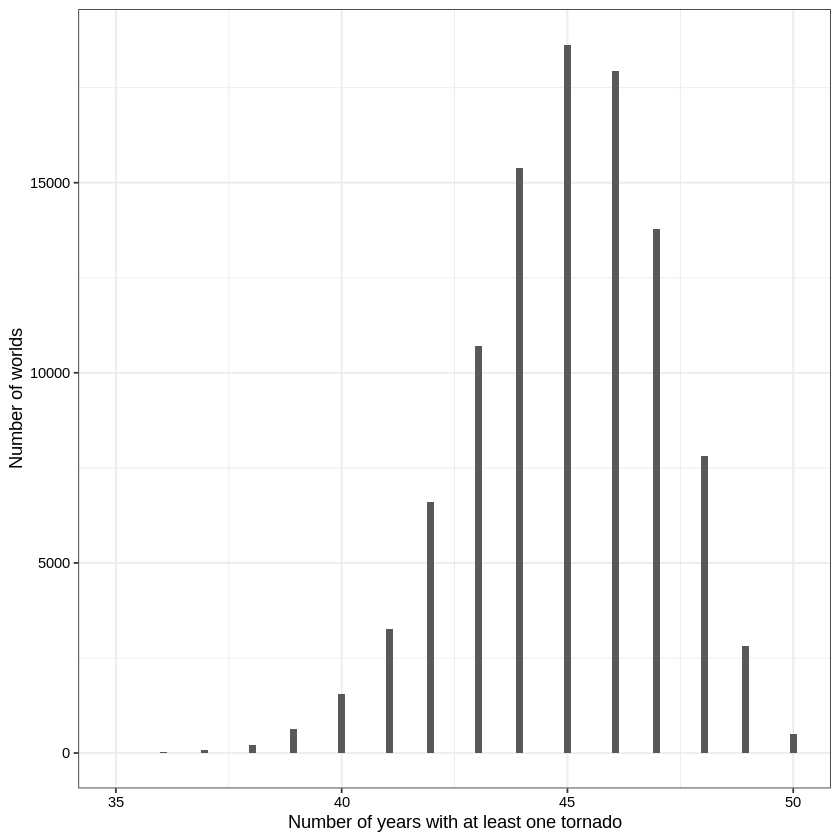

In [17]:
ggplot(tibble(num_tornadoes = many_worlds), aes(x = num_tornadoes)) + 
  geom_histogram(bins=100) +
  scale_y_continuous('Number of worlds') +
  scale_x_continuous('Number of years with at least one tornado') +
  theme(axis.text.x = element_text(color="black"),
          axis.text.y = element_text(color="black"))

ggsave('tornadoes2.png', width=4, height=4)

##Part 2: Expectation

In [18]:
set.seed(2)

num_tornadoes <- c(0, 1, 2, 3, 4, 5)
p <- c(.1, .15, .4, .2, .1, .05)

many_worlds <- sample(num_tornadoes, 1e5, prob = p, replace = TRUE)

In [19]:
mean(many_worlds)

[1] 2.20134

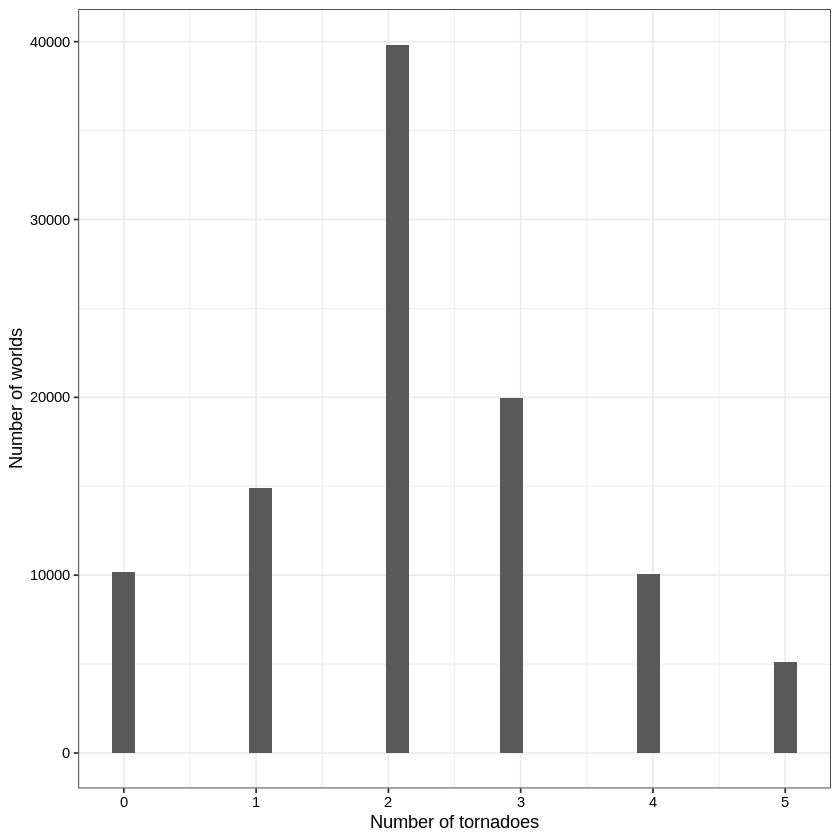

In [20]:
ggplot(tibble(outcome = many_worlds), aes(x = outcome)) + 
  geom_histogram(bins=30) +
  scale_y_continuous('Number of worlds') +
  scale_x_continuous('Number of tornadoes', breaks=0:5) +
  theme(axis.text.x = element_text(color="black"),
          axis.text.y = element_text(color="black"))

ggsave('tornadoes.png', width=4, height=4)

In [21]:
tibble(num_tornadoes = many_worlds) %>%
  count(num_tornadoes) %>%
  mutate(fraction = n / 1e5)

num_tornadoes,n,fraction
<dbl>,<int>,<dbl>
0,10168,0.10168
1,14886,0.14886
2,39838,0.39838
3,19954,0.19954
4,10060,0.10060
5,5094,0.05094


In [22]:
0 * 0.10168 + 1 * 0.14886 + 2 * 0.39838 + 3 * 0.19954 + 4 * 0.10060 + 5 * 0.05094


[1] 2.20134

Now we compute the expected number of years in which there's at least 1 tornado

In [23]:
many_worlds <- replicate(1e5, sum(rbernoulli(50, 0.9)))
head(many_worlds)

[1] 46 44 47 46 43 49

In [24]:
mean(many_worlds)

[1] 44.99123

## Part 3: Intergenerational mobility

In [25]:
mobility <- tibble(
  parent_q = c('parent_q1', 'parent_q2', 'parent_q3', 'parent_q4', 'parent_q5'),
  child_q1 = c(0.064, 0.047, 0.035, 0.028, 0.025),
  child_q2 = c(0.055, 0.047, 0.039, 0.032, 0.027),
  child_q3 = c(0.039, 0.044, 0.043, 0.041, 0.034),
  child_q4 = c(0.026, 0.036, 0.044, 0.047, 0.047),
  child_q5 = c(0.016, 0.026, 0.039, 0.052, 0.068)
) %>%
  column_to_rownames("parent_q")
mobility

,child_q1,child_q2,child_q3,child_q4,child_q5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
parent_q1,0.064,0.055,0.039,0.026,0.016
parent_q2,0.047,0.047,0.044,0.036,0.026
parent_q3,0.035,0.039,0.043,0.044,0.039
parent_q4,0.028,0.032,0.041,0.047,0.052
parent_q5,0.025,0.027,0.034,0.047,0.068


In [26]:
cond_mobility <- mobility / 0.2
cond_mobility

,child_q1,child_q2,child_q3,child_q4,child_q5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
parent_q1,0.320,0.275,0.195,0.130,0.080
parent_q2,0.235,0.235,0.220,0.180,0.130
parent_q3,0.175,0.195,0.215,0.220,0.195
parent_q4,0.140,0.160,0.205,0.235,0.260
parent_q5,0.125,0.135,0.170,0.235,0.340


In [27]:
cond_mobility %>%
  mutate(expected_quintile = 1*child_q1 + 2*child_q2 + 3*child_q3 + 4*child_q4 + 5*child_q5)



,child_q1,child_q2,child_q3,child_q4,child_q5,expected_quintile
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
parent_q1,0.320,0.275,0.195,0.130,0.080,2.375
parent_q2,0.235,0.235,0.220,0.180,0.130,2.735
parent_q3,0.175,0.195,0.215,0.220,0.195,3.065
parent_q4,0.140,0.160,0.205,0.235,0.260,3.315
parent_q5,0.125,0.135,0.170,0.235,0.340,3.545


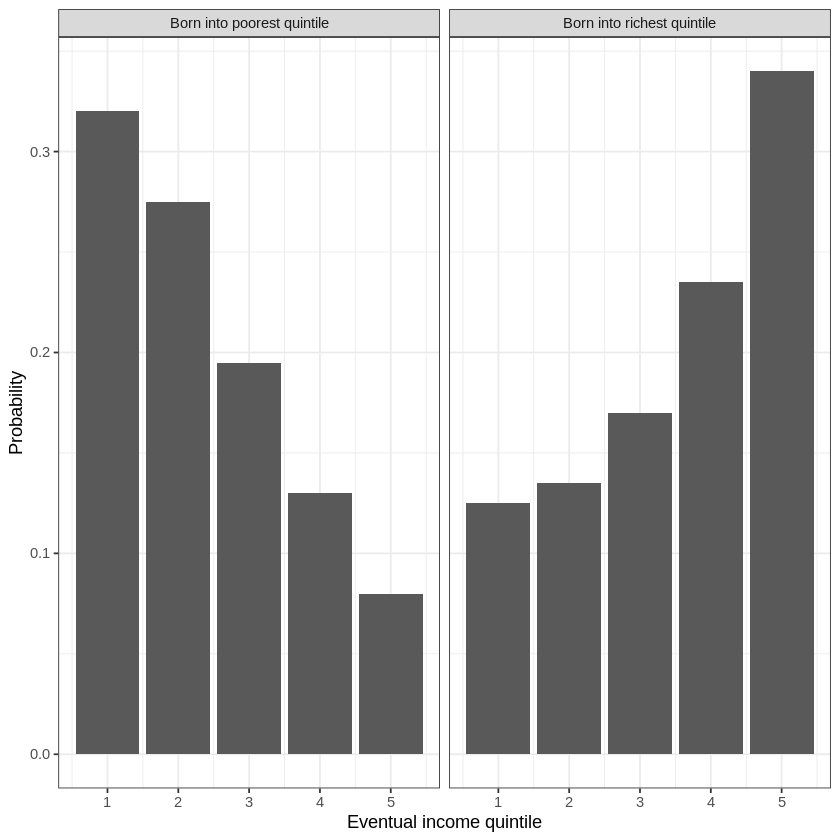

In [28]:
cond_mobility %>% 
  slice(c(1,5)) %>%
  rownames_to_column('parent_quintile') %>%
   pivot_longer(starts_with('child'), names_to = 'child_quintile') %>%
   mutate(
     parent_quintile = recode_factor(parent_quintile, 
      parent_q1 = "Born into poorest quintile",
      parent_q5 = "Born into richest quintile"),
     child_quintile = c(1:5, 1:5)
    ) %>%
   ggplot(aes(x=child_quintile, y=value)) +
   geom_bar(stat='identity') + 
   facet_grid(~parent_quintile) + 
   scale_y_continuous('Probability') +
   scale_x_continuous("Eventual income quintile")

   ggsave('income_quintiles.png', width = 7, height = 4)